In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from utiltis import compair, many_plot, read_img

print(f'OpenCV python version is: {cv2.__version__}')

OpenCV python version is: 4.6.0


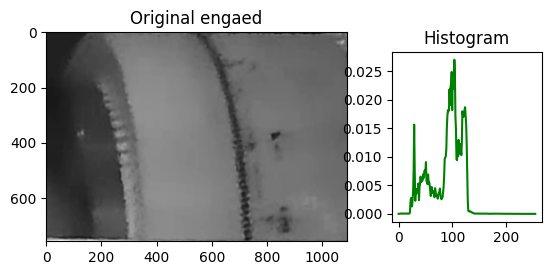

In [2]:
from matplotlib.gridspec import GridSpec
# img = read_img(img_name='lstest/10.jpg', gray=True)
img = read_img(img_name='test1_r.jpg', gray=True)

# Caculate the histogram of this image
h = cv2.calcHist([img], [0], None, [256], [0, 256])
h = h/np.size(img)

_, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios':[2, 1]})
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original engaed')
axes[1].plot(h, 'g')
axes[1].set_title('Histogram')
axes[1].set_aspect(60*255*img.shape[0]/(img.shape[1]))



Text(0.5, 1.0, 'OTSU method(Threshold=76.0)')

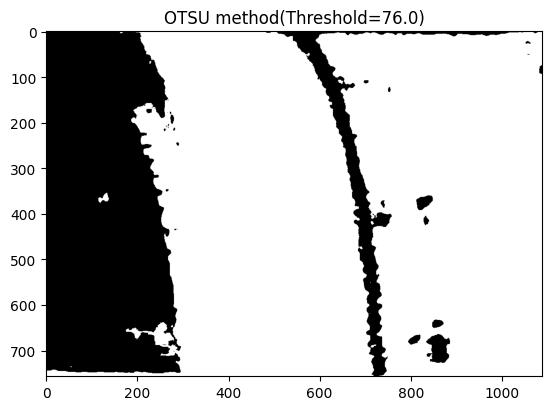

In [3]:
thres, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(bin_img, cmap='gray')
plt.title(f'OTSU method(Threshold={thres})')

True

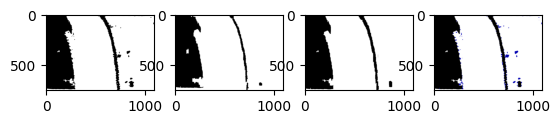

In [4]:
k = np.ones(3, dtype=np.uint8)
iter_num = 15
dila_bimg = cv2.dilate(bin_img, kernel=k, iterations=iter_num)
erod_bimg = cv2.erode(bin_img, kernel=k, iterations=iter_num)

# op_bimg = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel=k, iterations=iter_num)
op_bimg = cv2.erode(dila_bimg, kernel=k, iterations=iter_num)
# Compare two images
# c_dimg = compair(bin_img, dila_bimg)
c_dimg = compair(bin_img, op_bimg)

# many_plot((1, 3), [bin_img, dila_bimg, op_bimg], exclude=[2], cmap='gray')
many_plot((1, 4), [bin_img, dila_bimg, op_bimg, c_dimg], cmap='gray', exclude=[3])
# plt.imshow(c_dimg)
cv2.imwrite('output3.png', c_dimg)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

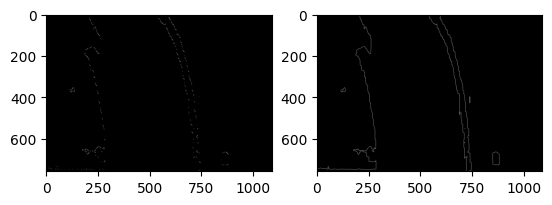

In [5]:

# opt = op_bimg
opt = op_bimg
sobel = cv2.Sobel(opt, -1, 1, 1, ksize=3)
# plt.imshow(sobel, cmap='gray')

canny = cv2.Canny(opt, 50, 160)
# plt.imshow(canny, cmap='gray')

many_plot((1, 2), [sobel, canny], cmap='gray')

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

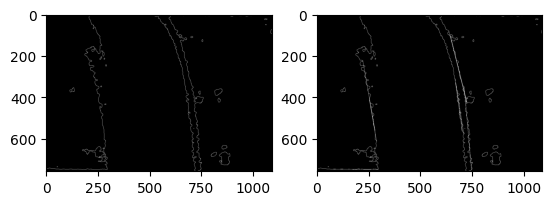

In [21]:
# No Robust method(RANSAC) applied
lines = cv2.HoughLinesP(canny, 1, np.pi/180, 5, minLineLength=200, maxLineGap=40)
# Robust method applied

# print('Found {')
op = canny.copy()
for line in lines:
    x1, y1, x2,  y2= line[0]
    cv2.line(op, (x1, y1), (x2, y2), 255, 1)

many_plot((1, 2), [canny, op], cmap='gray')

In [22]:
cv2.imwrite('output4.png', op)

True

(<Figure size 640x480 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

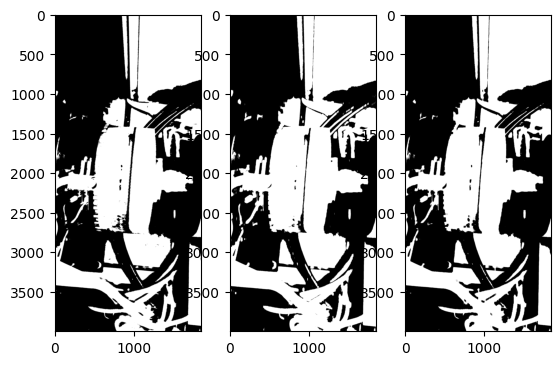

In [7]:
# 先测试简单的 膨胀 和 腐蚀
kernel = np.ones(3, dtype=np.uint8)
iternum = 10
dila_bimg = cv2.dilate(bin_img, kernel, iterations=iternum)
# dilation binary image

erod_bimg = cv2.erode(dila_bimg, kernel, iterations=iternum)



# plt.imshow(dila_bimg)
many_plot((1, 3), [bin_img, dila_bimg, erod_bimg], cmap='gray')

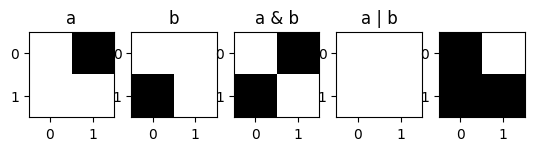

In [8]:
a = np.array([[1, 0], [1, 1]]); b = np.array([[1, 1], [0, 1]])
apb = a & b
aob = a | b

plt.subplot(1, 5, 1)
plt.imshow(a, cmap='gray'); plt.title('a')
plt.subplot(1, 5, 2)
plt.imshow(b, cmap='gray'); plt.title('b')
plt.subplot(1, 5, 3)
plt.imshow(apb, cmap='gray'); plt.title('a & b')
plt.subplot(1, 5, 4)
plt.imshow(aob, cmap='gray', vmin=0, vmax=1); plt.title('a | b')
plt.subplot(1, 5, 5)
plt.imshow(a==0, cmap='gray')

In [9]:
def compair(imga, imgb, lu=178):
    assert imga.shape == imgb.shape
    xab = np.logical_xor(imga==0, imgb==0)
    elimination = np.logical_and(xab, imgb==0)
    complement = np.logical_and(xab, imga==0)

    new_img = np.tile(np.expand_dims(imga, axis=-1), 3) # Tile to 3 channels BGR arrangement followed
    new_img[elimination, :] = [0, 0, lu]
    new_img[complement, :] = [lu, 0, 0]
    return new_img, elimination, complement


[[255 178]
 [  0 255]]
====
[[255   0]
 [  0 255]]
====
[[255   0]
 [178 255]]
====
[[False False]
 [ True False]]
====
[[False  True]
 [False False]]


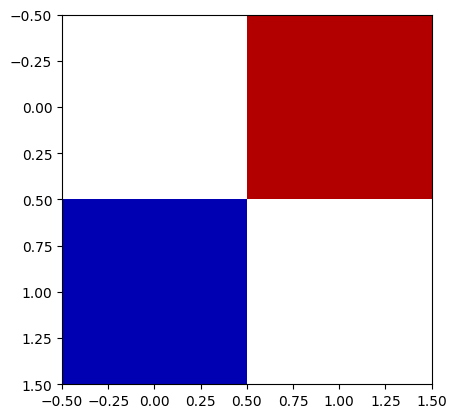

In [10]:
d, e, c = compair(a*255, b*255)
print(d[..., 0], d[..., 1], d[..., 2], e, c, sep='\n====\n')
plt.imshow(d)

In [11]:
b[1, 1, :] = [1, 0, 0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
b[..., 2]

array([[1., 0.],
       [0., 0.]])